<a href="https://colab.research.google.com/github/samuelcoflo/Analitica-de-Negocios/blob/main/Reto_3_Samuel_Correa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Samuel Correa Reto 3**


0. Cargo Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Para no tener que cargar el archivo
from google.colab import drive
drive.mount('/content/drive')

#Prestamo Interbibliotecario
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Cargo Archivo

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Esta es la matriz de correlacion:
              Age    Income     Hours    Enroll
Age     1.000000  0.450562 -0.040133  0.644033
Income  0.450562  1.000000 -0.018196  0.476372
Hours  -0.040133 -0.018196  1.000000 -0.048184
Enroll  0.644033  0.476372 -0.048184  1.000000


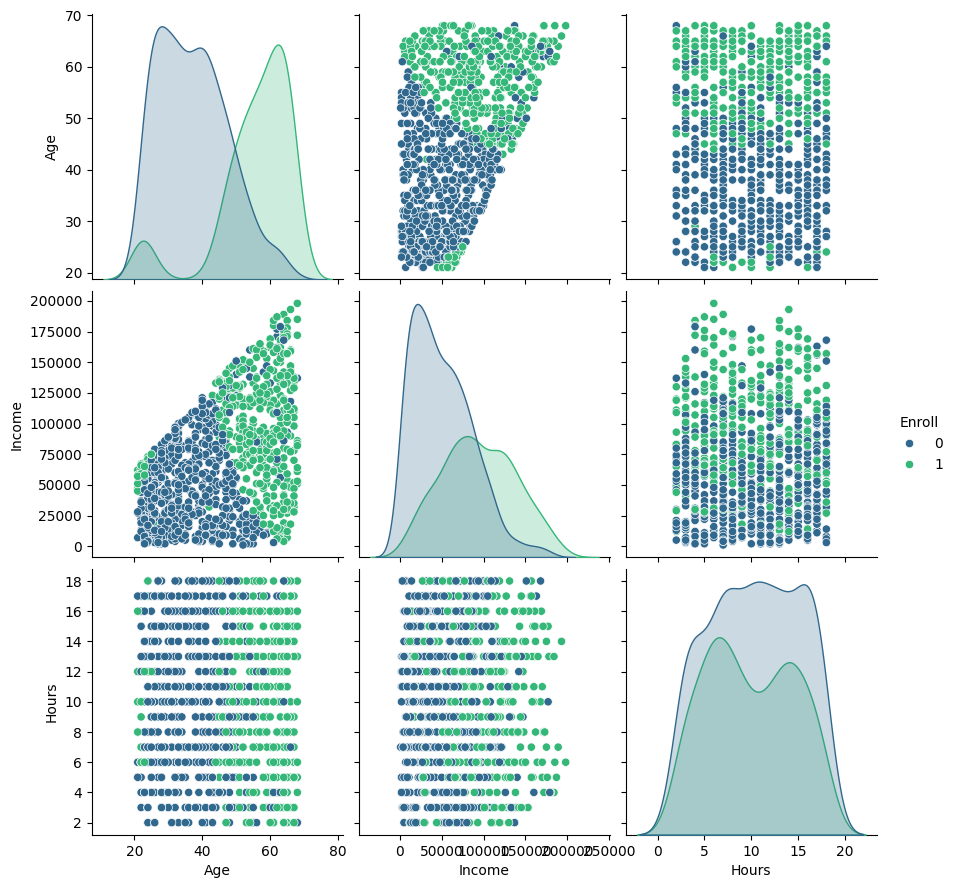

In [ ]:
nxl='/content/drive/MyDrive/Analitica de Negocios/3. BD1-GymData_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(100)

XDB=XDB[['Age', 'Income', 'Hours', 'Enroll']]

sns.pairplot(XDB,hue='Enroll',size=3,vars=['Age', 'Income', 'Hours'], palette='viridis')


#Para confirmar la buena correlacion
corr = XDB.corr()
print("Esta es la matriz de correlacion:\n",corr)

#Se procede con la configuracion de los datos de entrada y salida
XD=np.array(XDB.iloc[:,0:3])      #Toma las variables de entrada, Edad, Ingresos, Egresos, Monto(EAD)
yd=np.array(XDB.iloc[:,3])        #Age) # Access the first column (index 0)

2. Implemento KNN

Esta es la matriz de confusion:
 [[538  59]
 [145 258]]
La Exactitud es: 0.796
La Sensibilidad es: 0.6401985111662531
La Especificidad es: 0.9011725293132329


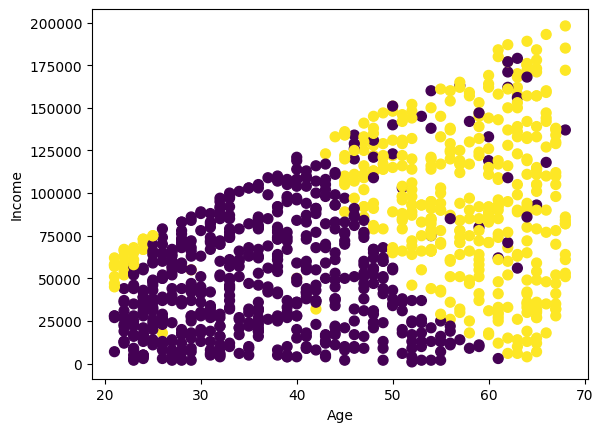

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10) #Tomar 10 Vecinos
mknn.fit(XD,yd) #Se ajusta el modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print("Esta es la matriz de confusion:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Esp=VN/(VN+FP)
print("La Exactitud es:",Exac)
print("La Sensibilidad es:",Sen)
print("La Especificidad es:",Esp)

#Las graficas siempre se hacen con las variables que tienen mas correlación
plt.scatter(XD[:,0],XD[:,1],c=yd,s=50,cmap='viridis')
plt.xlabel('Age');plt.ylabel('Income')
plt.show()

3. Evaluar persona especifica

Esta persona compra membresia? [0]


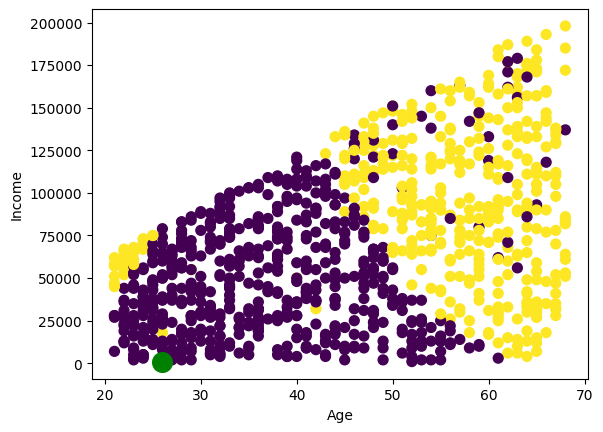

Poco probable que no compre membresia


In [ ]:
XDP=np.array([[26,800,15]])
ydpp=mknn.predict(XDP)
print("Esta persona compra membresia?",ydpp)

#Las graficas siempre se hacen con las variables que tienen mas correlación
plt.scatter(XD[:,0],XD[:,1],c=yd,s=50,cmap='viridis')
plt.scatter(XDP[:,0],XDP[:,1],marker='o',s=200,facecolors='green')
plt.xlabel('Age');plt.ylabel('Income')
plt.show()
print("Poco probable que no compre membresia")


4. Construccion Cluster KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Donde quedo el primer solicitante 0
Donde quedo el segundo solicitante 0
Donde quedo el tercer solicitante 3


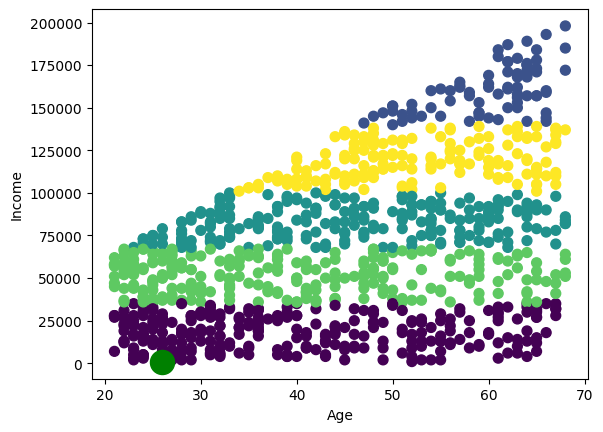

En que cluster esta? [0]
El número de personas que no compraron la membresia para el cluster 0 es: 238
El número de personas que compraron la membresia para el cluster 0 es: 45
El porcentaje de personas que no compraron la membresia para el cluster 0 es: 0.8409893992932862
El porcentaje de personas que compraron la membresia para el cluster 0 es: 0.15901060070671377
El número de personas que no compraron la membresia para el cluster 1 es: 13
El número de personas que compraron la membresia para el cluster 1 es: 64
El porcentaje de personas que no compraron la membresia para el cluster 1 es: 0.16883116883116883
El porcentaje de personas que compraron la membresia para el cluster 1 es: 0.8311688311688312
El número de personas que no compraron la membresia para el cluster 2 es: 123
El número de personas que no compraron la membresia para el cluster 2 es: 106
El porcentaje de personas que no compraron la membresia para el cluster 2 es: 0.537117903930131
El porcentaje de personas que compra

In [ ]:
np.random.seed(77) #Para que a todos nos de el mismo modelo

mkm=KMeans(n_clusters=5,init='random',random_state=77) #5 Clusters o montoncitos de datos
mkm.fit(XD,yd)
labels=mkm.labels_ #Donde quedaron clasificados cada uno de los solicitantes de créditos
print("Donde quedo el primer solicitante",labels[0,])
print("Donde quedo el segundo solicitante",labels[1,])
print("Donde quedo el tercer solicitante",labels[2,])

#Mapeo de los clusters - Como quedaron clasificados los solicitantes
plt.scatter(XD[:,0],XD[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(XDP[:,0],XDP[:,1],marker='o',s=300,facecolors='green')
plt.xlabel('Age');plt.ylabel('Income')
plt.show()

#Donde quedó el personaje especifico?
XDP=np.array([[26,800,15]])
ydpp2=mkm.predict(XDP)
print("En que cluster esta?",ydpp2)

#Cual es el procentaje de personas que compraron la membresia y los que no del cluster 0
c00=len(np.where((labels==0) & (yd==0))[0])
print("El número de personas que no compraron la membresia para el cluster 0 es:",c00)
c01=len(np.where((labels==0) & (yd==1))[0])
print("El número de personas que compraron la membresia para el cluster 0 es:",c01)
print("El porcentaje de personas que no compraron la membresia para el cluster 0 es:",c00/(c00+c01))
print("El porcentaje de personas que compraron la membresia para el cluster 0 es:",c01/(c00+c01))

#Cual es el procentaje de personas que compraron la membresia y los que no del cluster 1
c10=len(np.where((labels==1) & (yd==0))[0])
print("El número de personas que no compraron la membresia para el cluster 1 es:",c10)
c11=len(np.where((labels==1) & (yd==1))[0])
print("El número de personas que compraron la membresia para el cluster 1 es:",c11)
print("El porcentaje de personas que no compraron la membresia para el cluster 1 es:",c10/(c10+c11))
print("El porcentaje de personas que compraron la membresia para el cluster 1 es:",c11/(c10+c11))

#Cual es el procentaje de personas que compraron la membresia y los que no del cluster 2
c20=len(np.where((labels==2) & (yd==0))[0])
print("El número de personas que no compraron la membresia para el cluster 2 es:",c20)
c21=len(np.where((labels==2) & (yd==1))[0])
print("El número de personas que no compraron la membresia para el cluster 2 es:",c21)
print("El porcentaje de personas que no compraron la membresia para el cluster 2 es:",c20/(c20+c21))
print("El porcentaje de personas que compraron la membresia para el cluster 2 es:",c21/(c20+c21))

#Cual es el procentaje de personas que compraron la membresia y los que no del cluster 3
c30=len(np.where((labels==3) & (yd==0))[0])
print("El número de personas que no compraron la membresia para el cluster 3 es:",c30)
c31=len(np.where((labels==3) & (yd==1))[0])
print("El número de personas que compraron la membresia para el cluster 3 es:",c31)
print("El porcentaje de personas que no compraron la membresia para el cluster 3 es:",c30/(c30+c31))
print("El porcentaje de personas que compraron la membresia para el cluster 3 es:",c31/(c30+c31))

#Cual es el procentaje de personas que compraron la membresia y los que no del cluster 4
c40=len(np.where((labels==4) & (yd==0))[0])
print("El número de personas que no compraron la membresia para el cluster 4 es:",c40)
c41=len(np.where((labels==4) & (yd==1))[0])
print("El número de personas que compraron la membresia para el cluster 4 es:",c41)
print("El porcentaje de personas que no compraron la membresia para el cluster 4 es:",c40/(c40+c41))
print("El porcentaje de personas que compraron la membresia para el cluster 4 es:",c41/(c40+c41))



#Cual es la caracteristica sociodemografica de cada cluster
clusters=mkm.cluster_centers_
print("Las caracteristicas sociodemograficas de cada cluster:\n",clusters)

In [ ]:
# Encuentra el índice del cluster con la mayor edad
indice_mayor_edad = np.argmax(clusters[:, 0])
print("El cluster con mayor edad es el cluster", indice_mayor_edad)

# Encuentra el índice del cluster con la mayor ingresos
indice_mayor_ingresos = np.argmax(clusters[:, 1])
print("El cluster con mayor ingresos es el cluster", indice_mayor_ingresos)

# Encuentra el índice del cluster con la mayor numero de horas
indice_mayor_horas = np.argmax(clusters[:, 2])
print("El cluster con mayor horas es el cluster", indice_mayor_horas)

El cluster con mayor edad es el cluster 1
El cluster con mayor ingresos es el cluster 1
El cluster con mayor horas es el cluster 2


Las variables que se utilizaron fueron la edad, los ingresos de las personas, las horas que pasan en promedio en el gimnasio y si compraron la membresia o no.

**Analisis de Resultados**

Los ingresos son el factor que mejor predice la inscripción en un gimnasio, siendo más probable que se inscriban las personas con ingresos más elevados. La edad y los ingresos están muy correlacionados, lo que sugiere efectos interrelacionados en la inscripción. El modelo KNN que predice la inscripción alcanzó una precisión del 79,6%, con una especificidad alta (90%) pero una sensibilidad baja (64%). Esto indica un buen rendimiento a la hora de identificar a los no inscritos, pero un margen de mejora en la predicción de las afiliaciones reales. En análisis posteriores se podrían explorar variables adicionales para mejorar el poder predictivo del modelo, sobre todo en los casos de inscripción positiva.

Los resultados de este análisis se pueden utilizar para dirigir las estrategias de marketing y ventas a grupos específicos de personas con más probabilidades de comprar una membresía.